(array([[ 1.26405235, -0.0189049 ],
        [ 0.47873798,  1.81916973],
        [ 1.36755799, -1.38538395]]), array([[1.43528206, 1.45048303],
        [1.1251739 , 0.74397013],
        [1.128319  , 1.5324854 ]]), array([[0.71973283, 0.62183077, 0.95707225],
        [0.28306295, 0.39846117, 0.27351902]]))

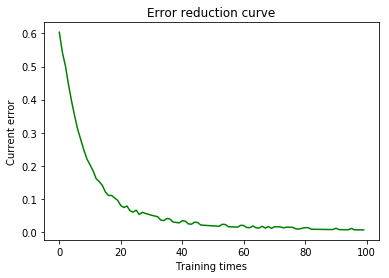

In [7]:
"""
Created on Sun Dec  9 09:41:42 2018
@author: Jude.wang
Email：wangyifan7836@gamil.com
Theme：Building a classifier using a neural network
Mathematical basis：Back propagation of BP algorithm
"""
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import loadmat
data=loadmat(r'data.mat')['data']
np.random.seed(0)



def back_propagation(train_data,eta):
    l,n=train_data.shape
    w=np.random.randn(3,2)-0.5
    v=np.random.rand(2,3)-0.5
    u=np.random.rand(3,2)-0.5
    delta3=np.array([0.5,0.5])  #给定初始delta
    delta2=np.array([0.5,0.5,0.5])
    delta1=np.array([0.5,0.5])
    mean_square_errors=[]
    for i in range(n):
        x=train_data[:,i][:3]
        y=train_data[:,i][3:]
        net2=np.dot(x,w)            #第一层求和
        hidden1=1/(1+m.e**-net2)   #进行sigmod的输出
        net3=np.dot(hidden1,v)     #第二次求和值
        hidden2=1/(1+m.e**-net3)   #进行sigmod的输出
        net4=np.dot(hidden2,u)    #进行第三次求和
        o=1/(1+m.e**-net4)         #进行sigmod处理输出最终的值
        ####反向传播计算——————————————————————————————————————
        delta3=(o-y)*o*(1-o)       #最后一个delta值
        for j in range(3):          #计算公式，与其后一层的delta值有关
            delta2[j]=hidden2[j]*(1-hidden2[j])*np.dot(delta3,u.T[:,j])   
        for k in range(2):         #计算公式，与其后一层的delta有关
            delta1[k]=hidden1[k]*(1-hidden1[k])*np.dot(delta2,v.T[:,k])
        #开始更新权重————————————————————————————————————————
        for i in range(3):
            for j in range(2):
                u[i,j]=u[i,j]-eta*delta3[j]*hidden2[i]
        for i in range(2):
            for j in range(3):
                v[i,j]=v[i,j]-eta*delta2[j]*hidden1[i]
        for i in range(3):
            for j in range(2):
                w[i,j]=w[i,j]-eta*delta1[j]*x[i]
        p=np.dot(o-y,o-y)
        mean_square_errors.append(p)
    plt.plot(range(n),mean_square_errors,color='g')
    plt.xlabel('Training times')
    plt.ylabel('Current error')
    plt.title('Error reduction curve')

    return w,u,v


back_propagation(data,0.9)